In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/tellco_data.csv')

In [3]:
df.drop_duplicates()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,end_date,end_time,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
0,1.311448e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2019-04-25,14:35:00,1.835594e+07,2.905912e+06,3.701304e+06,1.785519e+07,2.924265e+08,1.805588e+08,1.570185e+06,3.456294e+08
1,1.311448e+19,2019-04-09 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2019-04-25,08:15:00,3.935912e+07,4.414096e+06,9.373850e+05,3.556554e+07,6.099208e+08,5.419594e+08,1.933278e+06,7.071854e+08
2,1.311448e+19,2019-04-09 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2019-04-25,11:58:00,3.442524e+07,1.022912e+07,3.363124e+06,2.375120e+07,2.299803e+08,4.149084e+08,1.726277e+06,3.076910e+08
3,1.311448e+19,2019-04-10 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2019-04-25,07:36:00,3.653476e+07,1.181176e+07,2.070983e+06,1.509259e+07,8.103879e+08,7.618372e+08,6.574930e+05,8.893527e+08
4,1.311448e+19,2019-04-12 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,2019-04-25,10:40:00,3.422225e+07,7.748843e+06,2.110349e+06,1.753980e+07,5.312370e+08,5.646198e+08,9.127880e+05,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0000,2019-04-30 06:02:00,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,2019-04-30,06:02:00,2.795510e+07,1.278491e+07,6.908760e+05,3.756186e+07,5.358069e+08,1.675193e+07,3.517065e+06,6.318041e+08
149997,7.349883e+18,2019-04-29 07:28:00,483.0000,2019-04-30 10:41:00,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2019-04-30,10:41:00,2.216552e+07,4.415361e+06,2.121718e+06,4.064329e+07,6.316281e+08,7.146381e+08,2.352181e+06,7.057839e+08
149998,1.311448e+19,2019-04-29 07:28:00,283.0000,2019-04-30 10:46:00,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2019-04-30,10:46:00,2.451641e+07,6.585469e+06,2.058277e+06,1.502970e+07,5.669338e+08,1.324156e+08,1.260239e+06,6.276986e+08
149999,1.311448e+19,2019-04-29 07:28:00,696.0000,2019-04-30 10:40:00,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,2019-04-30,10:40:00,1.712251e+07,7.757267e+06,2.850914e+06,1.649484e+07,3.550664e+08,8.161200e+08,8.231090e+05,4.015220e+08


### Tracking users' engagement

#### metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


In [4]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

In [5]:
df['total_data(megabytes)'] = convert_bytes_to_megabytes(df, 'all_total_data_vol')

#### calculate each metric

In [6]:
# copy data
metric_df = df.copy(deep=True)

In [7]:
# aggregate columns
aggs_col = {'Bearer Id':'count', 'Dur. (ms)':'sum','total_data(megabytes)':'sum'}

metric_df = metric_df.groupby('MSISDN/Number').agg(aggs_col)
metric_df

,Bearer Id,Dur. (ms),total_data(megabytes)
MSISDN/Number,,,
3.360100e+10,1,116720.0,878.690574
3.360100e+10,1,181230.0,156.859643
3.360100e+10,1,134969.0,595.966483
3.360101e+10,1,49878.0,422.320698
3.360101e+10,2,37104.0,1457.410944
...,...,...,...
3.379000e+10,1,8810.0,714.641641
3.379000e+10,1,140988.0,480.307335
3.197021e+12,1,877385.0,232.123971


### Top 10 customers per engagement metric

In [8]:
# sessions frequency
metric_df = metric_df.sort_values('Bearer Id', ascending=False).iloc[:10, :]
pd.DataFrame(metric_df.loc[:, 'Bearer Id'])

,Bearer Id
MSISDN/Number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360452e+10,12


In [9]:
# duratioon of the session
metric_df = metric_df.sort_values('Dur. (ms)', ascending=False).iloc[:10, :]
pd.DataFrame(metric_df.loc[:, 'Dur. (ms)'])

,Dur. (ms)
MSISDN/Number,
3.366371e+10,7.267378e+07
3.362578e+10,1.855375e+07
3.361489e+10,9.966898e+06
3.376054e+10,9.279434e+06
3.362632e+10,8.791927e+06
3.366716e+10,8.744914e+06
3.376041e+10,5.321667e+06
3.360452e+10,5.207990e+06
3.367588e+10,4.865947e+06


In [10]:
# session total traffic
metric_df = metric_df.sort_values('total_data(megabytes)', ascending=False).iloc[:10, :]
pd.DataFrame(metric_df.loc[:, 'total_data(megabytes)'])

,total_data(megabytes)
MSISDN/Number,
3.366371e+10,531962.337763
3.361489e+10,8846.226494
3.376054e+10,8514.773963
3.362578e+10,8499.620722
3.362632e+10,7971.167261
3.367588e+10,7891.110608
3.365973e+10,7705.862783
3.376041e+10,7132.370514
3.366716e+10,5618.394054


### Normalizing each metric

In [11]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
standardizer = StandardScaler().fit_transform(metric_df)

In [12]:
metric_df

,Bearer Id,Dur. (ms),total_data(megabytes)
MSISDN/Number,,,
3.366371e+10,1067,7.267378e+07,531962.337763
3.361489e+10,17,9.966898e+06,8846.226494
3.376054e+10,15,9.279434e+06,8514.773963
3.362578e+10,17,1.855375e+07,8499.620722
3.362632e+10,18,8.791927e+06,7971.167261
3.367588e+10,15,4.865947e+06,7891.110608
3.365973e+10,16,4.035428e+06,7705.862783
3.376041e+10,12,5.321667e+06,7132.370514
3.366716e+10,13,8.744914e+06,5618.394054


### k-means (k=3) to classify customers in three groups of engagement. 

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Centroids of the clustering:
	[[1.37500000e+01 4.85775800e+06 7.05429980e+03]
 [1.06700000e+03 7.26737776e+07 5.31962338e+05]
 [1.60000000e+01 1.10673854e+07 7.89003650e+03]]
# The number of iterations required to converge: 72039320005850.73
# The number of iterations required to converge: 4


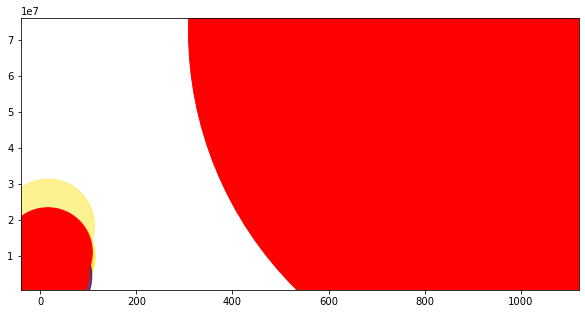

In [14]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42).fit(metric_df)
centroids = kmeans.cluster_centers_

print(f'# Centroids of the clustering:\n\t{centroids}')
print(f'# The number of iterations required to converge: {kmeans.inertia_}')
print(f'# The number of iterations required to converge: {kmeans.n_iter_}')

plt.figure(figsize=(10,5))
plt.scatter(metric_df['Bearer Id'], metric_df['Dur. (ms)'], metric_df['total_data(megabytes)'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='red')
plt.show()

### Compute the minimum, maximum, average & total non- normalized metrics for each cluster.

In [15]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,end_time,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol,total_data(megabytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,14:35:00,18355943.0,2905912.0,3701304.0,17855187.0,292426453.0,180558843.0,1570185.0,345.629377,345.629377
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,08:15:00,39359124.0,4414096.0,937385.0,35565545.0,609920783.0,541959383.0,1933278.0,707.185356,707.185356
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,11:58:00,34425237.0,10229119.0,3363124.0,23751202.0,229980251.0,414908351.0,1726277.0,307.690973,307.690973
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,07:36:00,36534765.0,11811761.0,2070983.0,15092588.0,810387875.0,761837216.0,657493.0,889.352748,889.352748
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,10:40:00,34222253.0,7748843.0,2110349.0,17539799.0,531237049.0,564619822.0,912788.0,607.681403,607.681403


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [16]:
engagement_df = df.copy(deep=True)

In [17]:
agg_by_col = {'youtube_total_data_vol':'sum',
'google_total_data_vol':'sum',
'email_total_data_vol':'sum',
'netflix_total_data_vol':'sum',
'gaming_total_data_vol':'sum',
'other_total_data_vol':'sum',
'social_media_total_data_vol':'sum','all_total_data_vol':'sum'}

engagement_df = engagement_df.groupby('MSISDN/Number').agg(agg_by_col)
engagement_df

,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
MSISDN/Number,,,,,,,,
3.360100e+10,21624548.0,4389005.0,1331362.0,27180981.0,8.124587e+08,386570872.0,2232135.0,878.690574
3.360100e+10,12432223.0,5334863.0,3307781.0,11221763.0,1.197501e+08,281710071.0,2660565.0,156.859643
3.360100e+10,21333570.0,3443126.0,3205380.0,19353900.0,5.388277e+08,501693672.0,3195623.0,595.966483
3.360101e+10,6977321.0,9678493.0,2284670.0,1942092.0,3.911261e+08,35279702.0,280294.0,422.320698
3.360101e+10,41533002.0,18499616.0,3305469.0,49201724.0,1.314798e+09,804804484.0,2912542.0,1457.410944
...,...,...,...,...,...,...,...,...
3.379000e+10,26647843.0,7531269.0,1006915.0,14902538.0,6.603614e+08,295282817.0,300183.0,714.641641
3.379000e+10,19851572.0,5429705.0,2514097.0,8531060.0,4.370033e+08,211115113.0,498569.0,480.307335
3.197021e+12,11959905.0,10438660.0,1520771.0,26592300.0,1.780487e+08,470526473.0,715224.0,232.123971


* Top 10 most engaged youtube users 

In [18]:
engagement_df = engagement_df.sort_values('youtube_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'youtube_total_data_vol'])

,youtube_total_data_vol
MSISDN/Number,
3.366371e+10,2.435073e+10
3.362578e+10,4.529588e+08
3.376054e+10,3.962892e+08
3.361489e+10,3.943702e+08
3.362632e+10,3.744830e+08
3.367588e+10,3.174106e+08
3.366716e+10,3.152313e+08
3.362708e+10,3.087908e+08
3.376041e+10,3.031691e+08


* Top 10 most engaged google users 

In [19]:
engagement_df = engagement_df.sort_values('google_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'google_total_data_vol'])

,google_total_data_vol
MSISDN/Number,
3.366371e+10,8.250702e+09
3.362632e+10,1.521919e+08
3.362578e+10,1.423079e+08
3.361489e+10,1.279738e+08
3.376054e+10,1.232231e+08
3.367588e+10,1.098605e+08
3.366716e+10,1.050327e+08
3.362708e+10,8.712592e+07
3.376041e+10,8.273872e+07


* Top 10 most engaged email users

In [20]:
engagement_df = engagement_df.sort_values('email_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'email_total_data_vol'])

,email_total_data_vol
MSISDN/Number,
3.366371e+10,2.403622e+09
3.362632e+10,4.241878e+07
3.361489e+10,4.078863e+07
3.362578e+10,4.063397e+07
3.376054e+10,3.369377e+07
3.367588e+10,3.151442e+07
3.366716e+10,3.033580e+07
3.369879e+10,2.905904e+07
3.376041e+10,2.557696e+07


* Top 10 most engaged netflix users 

In [21]:
engagement_df = engagement_df.sort_values('netflix_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'netflix_total_data_vol'])

,netflix_total_data_vol
MSISDN/Number,
3.366371e+10,2.428211e+10
3.361489e+10,3.614010e+08
3.362578e+10,3.569806e+08
3.376054e+10,3.346433e+08
3.362632e+10,3.287257e+08
3.376041e+10,3.183475e+08
3.366716e+10,3.139395e+08
3.367588e+10,3.090932e+08
3.369879e+10,2.682475e+08


* Top 10 most engaged gaming users 

In [22]:
engagement_df = engagement_df.sort_values('gaming_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'gaming_total_data_vol'])

,gaming_total_data_vol
MSISDN/Number,
3.366371e+10,4.616346e+11
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.362632e+10,6.887572e+09
3.376041e+10,6.268620e+09
3.369879e+10,5.753743e+09
3.362708e+10,4.972353e+09


* Top 10 most engaged other applications users 

In [23]:
engagement_df = engagement_df.sort_values('other_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'other_total_data_vol'])

,other_total_data_vol
MSISDN/Number,
3.366371e+10,4.516521e+11
3.362632e+10,8.167878e+09
3.361489e+10,7.639264e+09
3.367588e+10,6.798515e+09
3.362578e+10,6.354583e+09
3.362708e+10,5.117791e+09
3.366716e+10,4.941519e+09
3.376054e+10,4.716134e+09
3.369879e+10,4.689876e+09


* Top 10 most engaged social media applications users 

In [24]:
engagement_df = engagement_df.sort_values('social_media_total_data_vol', ascending=False).iloc[:10, :]
pd.DataFrame(engagement_df.loc[:, 'social_media_total_data_vol'])

,social_media_total_data_vol
MSISDN/Number,
3.366371e+10,1.974199e+09
3.362632e+10,4.337478e+07
3.376054e+10,3.978319e+07
3.361489e+10,2.829454e+07
3.362578e+10,2.713550e+07
3.366716e+10,2.424785e+07
3.376041e+10,2.077720e+07
3.367588e+10,1.922292e+07
3.362708e+10,1.780891e+07


### Top 3 most used applications

In [25]:
most_used_df = df.copy(deep=True)
most_used_df = most_used_df[['youtube_total_data_vol','google_total_data_vol','email_total_data_vol',
                                  'netflix_total_data_vol','gaming_total_data_vol','other_total_data_vol',
                                  'social_media_total_data_vol']]

In [26]:
total_used = pd.DataFrame(most_used_df.sum(), columns=['Total_data'])

In [27]:
total_used = total_used.sort_values(by='Total_data',ascending=False).iloc[:3,:]

In [28]:
total_used

,Total_data
gaming_total_data_vol,6.455040e+13
other_total_data_vol,6.440523e+13
youtube_total_data_vol,3.396545e+12


The top 3 most used applications are: Gaming, Other and Youtube applications

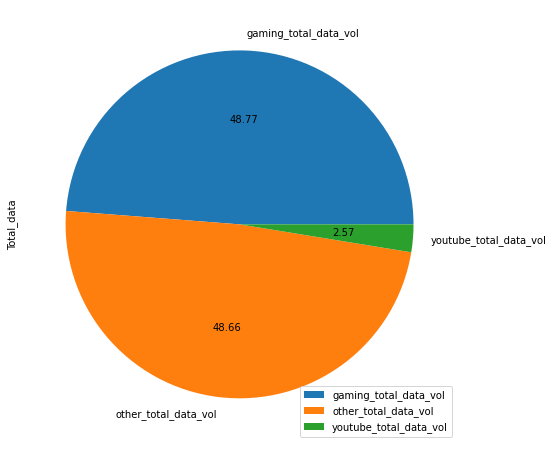

In [47]:
total_used.plot(kind="pie",y="Total_data", autopct='%.2f', figsize=(16,8))
plt.legend(loc = 'lower right')
plt.show()

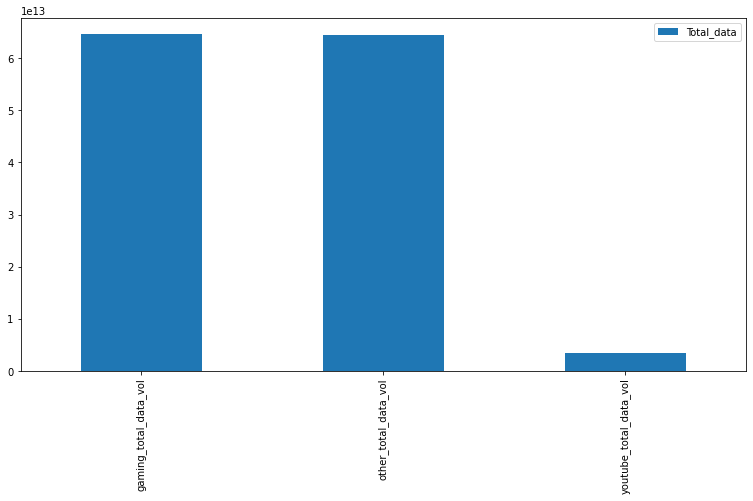

In [41]:
total_used.plot(kind="bar",y="Total_data", figsize=(13,6.5))
plt.show()

### K-means clustering algorithm

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [32]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(metric_df)
    distortions.append(kmeanModel.inertia_)

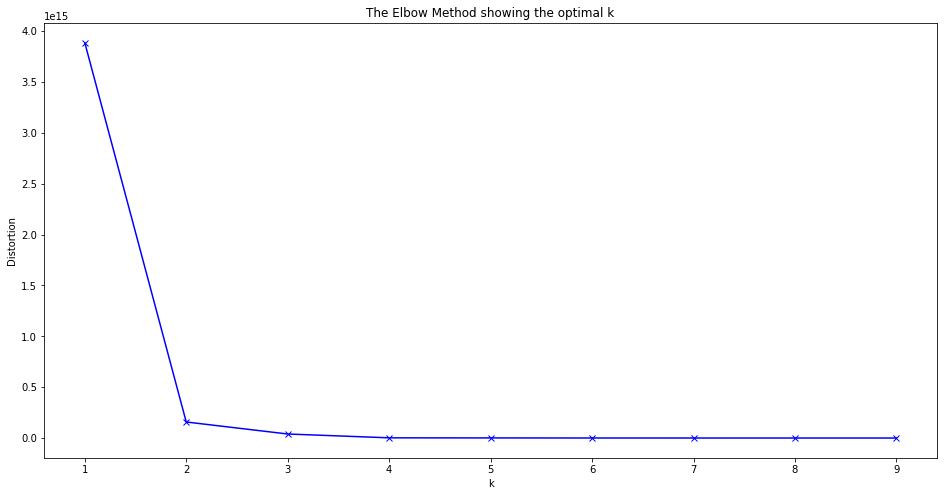

In [33]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 2 which is optimal value for k. 